In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2>NDVI</h2>
<p>A partir de dos imágenes monobanda recibidas como entrada (correspondientes a R y NIR) se calcula el NDVI correspondiente a cada píxel. Los resultados se llevarán al rango [1,255] antes de visualizarlos y devolverlos, y se comprobará sobre la imagen Landsat C.</p>

In [2]:
def ndvi(path_nir, path_r):
    img_nir=cv2.imread(path_nir, cv2.IMREAD_GRAYSCALE)
    img_r=cv2.imread(path_r, cv2.IMREAD_GRAYSCALE)
    ndvi_res=np.zeros((img_r.shape[0], img_r.shape[1]), np.uint8)
    for x in range(ndvi_res.shape[0]):
        for y in range(ndvi_res.shape[1]): 
            nir=float(img_nir[x,y])  #valor del ND de la imagen en NIR
            r=float(img_r[x,y])      #valor del ND de la imagen en Rojo
            if (nir+r)!=0:
                ndvi_res[x,y]=((nir-r)/(nir+r)+1)*127  #se calcula el NDVI y se lleva al rango [1,255]
            else:
                ndvi_res[x,y]=1      #si la resta de los dos ND es 0, el NDVI se establece a 1

    return ndvi_res

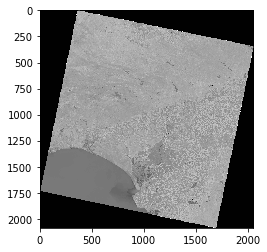

In [3]:
nir="../imgpack/Landsat C/Landsat_C_05-11_NIR.png"
r="../imgpack/Landsat C/Landsat_C_04-11_R.png"
img=ndvi(nir, r)
plt.imshow(img, cmap = 'gray')
plt.show()

In [4]:
cv2.imwrite("modificadas/Ej3_NDVI.png", img)

True